<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/BreastCancerAlgorithmsComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

#importing our cancer dataset
dataset = pd.read_csv('/content/breast-cancer.csv')


#X = dataset['radius mean', 'texture mean', 'perimeter mean', 'area_mean','smoothness_mean','compactness mean','concavity mean','concave points mean','symmetry mean','fractal dimension mean','radius se' ]
col_list = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se']
df = pd.read_csv("/content/breast-cancer.csv", usecols=col_list)#dataset['diagnosis']
#Setting our X and Y for trainig and testing 
X  = df
Y = dataset['diagnosis']



In [3]:
print("Cancer data set dimensions : {}".format(df.shape))
#Cancer data set dimensions : (569, 32)

Cancer data set dimensions : (569, 11)


In [4]:
#checking all nulls 
df.isnull().sum()
df.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
dtype: int64

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

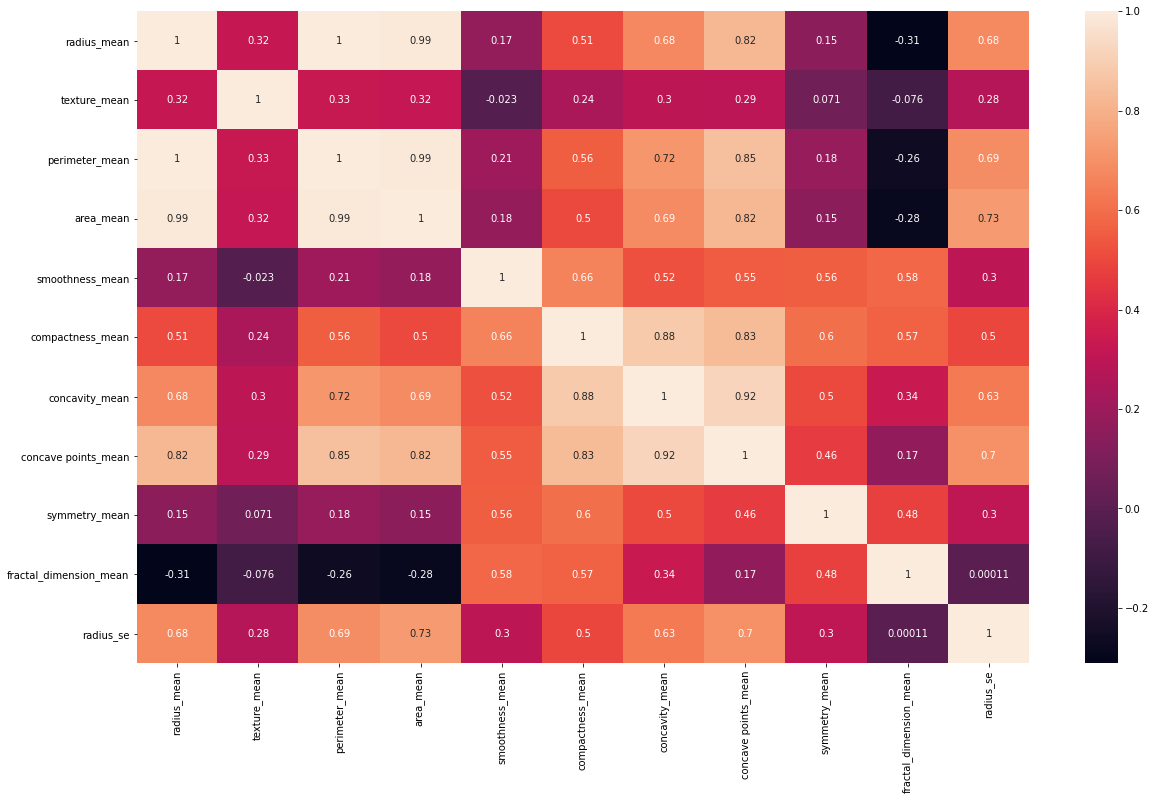

In [5]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y)
#Correlation Matrix
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.97153748,  0.24025169, -0.92299644, ..., -0.49708946,
         0.93480398, -0.27847563],
       [ 0.42032677,  0.00976515,  0.32908523, ..., -0.93808433,
        -1.23790935, -0.5916093 ],
       [ 1.27816964,  1.31737694,  1.3471713 , ...,  1.37987221,
        -0.08341615,  1.49907986],
       ...,
       [-0.58806468, -0.09977301, -0.62906513, ..., -0.90892765,
        -0.3115587 , -0.54568303],
       [-0.11369461,  0.74686569,  0.06635334, ...,  0.96438943,
         2.19035362, -0.65319225],
       [-1.2365598 , -0.53564361, -1.21035944, ..., -0.80323466,
         1.24562907,  0.01099906]])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier






#Using Logistic Regression Algorithm to the Training Set
models = [LogisticRegression(random_state = 0), 
          KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
          SVC(kernel = 'linear', random_state = 0),
          SVC(kernel = 'rbf', random_state = 0),
          GaussianNB(),
          RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0),
          DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
          AdaBoostClassifier(n_estimators=100, random_state=0)
          ]

CV = 5 
entries = []
for model in models: 
    counter = 2
    model_name = model.__class__.__name__
    for i in range(len(entries)):
      if (str(model_name) in entries[i]):
       model_name = model_name + "V" + str(counter)
    classifier = model

    clf = classifier.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    entries.append((model_name, accuracy*100))
print(len(entries))
entries
      


8


[('LogisticRegression', 96.49122807017544),
 ('KNeighborsClassifier', 92.98245614035088),
 ('SVC', 96.49122807017544),
 ('SVCV2', 94.73684210526315),
 ('GaussianNB', 92.10526315789474),
 ('RandomForestClassifier', 93.85964912280701),
 ('DecisionTreeClassifier', 94.73684210526315),
 ('AdaBoostClassifier', 94.73684210526315)]

In [10]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

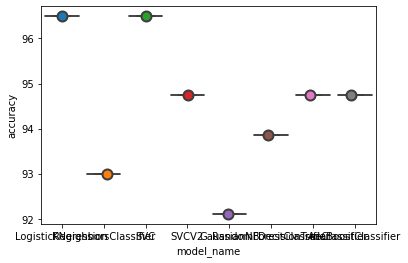

In [11]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'SVCV2'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'AdaBoostClassifier')]

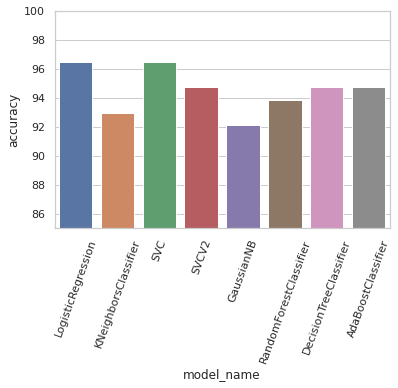

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ind = np.arange(len(cv_df['model_name']))


ax = sns.barplot(x=cv_df['model_name'], y=cv_df['accuracy'])
ax.set_ylim((85,100))

ax.set_xticks(range(0,len(ind)))

ax.set_xticklabels(list(cv_df['model_name']), rotation=70)


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'KNeighborsClassifier'),
 Text(0, 0, 'SVC'),
 Text(0, 0, 'SVCV2'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'AdaBoostClassifier')]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


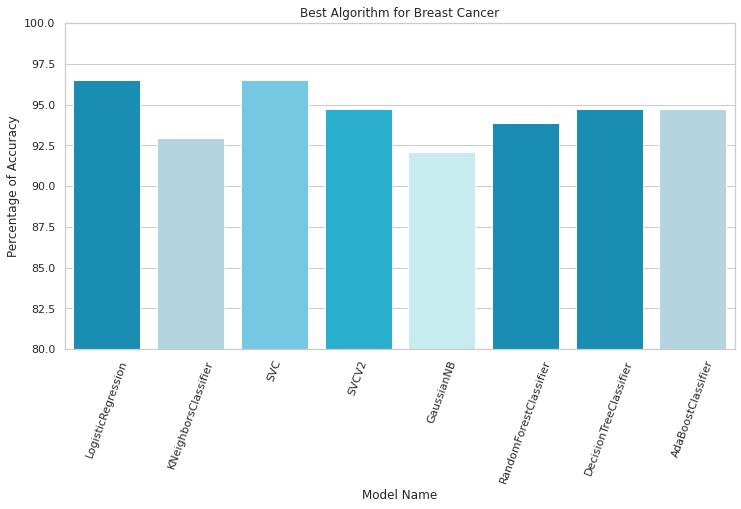

In [13]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=5
ind = np.arange(len(cv_df['model_name']))
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', 
                      '#C1F0F6', '#0099CC']
sns.barplot(x=cv_df['model_name'], y = cv_df['accuracy'],  
            data = df, palette=color_palette_list, 
            label="Percentage of yes responses to question", 
            ax=ax, ci=None)
ax.set_title("Best Algorithm for Breast Cancer")
ax.set_ylabel("Percentage of Accuracy")
ax.set_ylim(80,100)
ax.set_xlabel("Model Name")
ax.set_xticks(range(0,len(ind)))
ax.set_xticklabels(list(cv_df['model_name']), rotation=70)